In [52]:
import pandas as pd
import re
import seaborn as sns
import matplotlib as plt

pd.options.mode.chained_assignment = None

**Read in the Data**

In [53]:
tweets = pd.read_csv('../data/twitter_scrape.csv')

In [54]:
tweets

,datetime,tweet_id,username,text,likes,retweet
0,2020-01-20 22:47:13+00:00,1219390955905847299,ThisIsMarietta,Breaking News: The coronavirus is now confirme...,404,319
1,2020-01-20 21:20:57+00:00,1219369245940822017,deden1278,good luck everyone #coronavirus https://t.co/2...,17443,8905
2,2020-01-20 21:05:55+00:00,1219365461269213184,Urfacefooked,2020 just keeps getting a little more exciting...,594,159
3,2020-01-20 19:59:24+00:00,1219348721584025600,Varcarus,"The Plague was spread through rats, this year ...",348,53
4,2020-01-20 18:12:08+00:00,1219321726351396864,DrTedros,I am convening an Emergency Committee to ascer...,707,530
...,...,...,...,...,...,...
131176,2022-05-31 05:11:22+00:00,1531503579986546688,virtuallysoph,"Well, shit.\nAfter escaping it for 2 years, it...",106,0
131177,2022-05-31 03:51:09+00:00,1531483392776097792,j_mcelroy,#COVID19 wastewater measurements in Metro Vanc...,196,23
131178,2022-05-31 03:06:18+00:00,1531472108995645440,ellymelly,What frustrates me the most is that food short...,283,68
131179,2022-05-31 00:15:08+00:00,1531429032713232385,JamieMetzl,For those of us who have been calling since ea...,432,182


Distribution of likes and retweet; is greater than 100 likes a good cut off point?

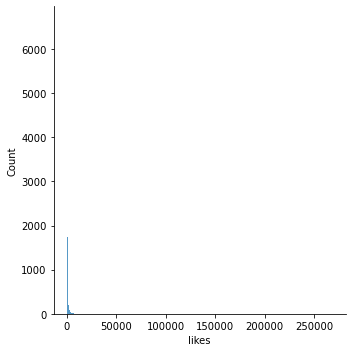

In [55]:
sns.displot(tweets,
            x = 'likes',
            edgecolor = 'none');

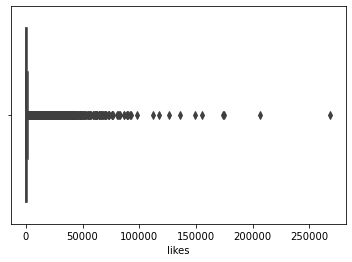

In [56]:
sns.boxplot(x=tweets['likes']);

In [57]:
tweets['likes'].describe()

count    131181.000000
mean        884.707930
std        2894.831654
min           0.000000
25%         240.000000
50%         378.000000
75%         721.000000
max      268369.000000
Name: likes, dtype: float64

In [58]:
# 0 minimum? look into why 
tweets[tweets['likes'] == 0]

,datetime,tweet_id,username,text,likes,retweet
11137,2020-03-26 23:33:04+00:00,1243320094354280455,ImAnthonyDaniel,My @united is trash tweet is missing... \n\nTh...,0,0


In [59]:
tweets[tweets['likes'] < 100]

,datetime,tweet_id,username,text,likes,retweet
2336,2020-02-05 20:36:31+00:00,1225156268043538432,momotrader,"US has 12 ""reported"" cases of the #coronavirus...",11,2
4291,2020-02-19 00:02:10+00:00,1229919066229370880,murakamiwood,"#COVID19 - oh, for a Twitter edit button.",2,0
5223,2020-02-25 17:35:53+00:00,1232358567681892354,HotepJesus,"They use the ""intellectual"" class aka useful i...",91,27
5765,2020-02-28 20:33:14+00:00,1233490365006667777,ckprussman,"🗣 Wash your hands, my peeps; wash your hands. ...",20,0
11137,2020-03-26 23:33:04+00:00,1243320094354280455,ImAnthonyDaniel,My @united is trash tweet is missing... \n\nTh...,0,0
14459,2020-04-11 20:45:03+00:00,1249076017555259394,SteveSweeney_NJ,Newly graduated law students will be able to p...,28,5
15692,2020-04-17 21:37:35+00:00,1251263562665857024,Laurie_Garrett,Santa Clara Co survey ests actual prevalence #...,49,21
20328,2020-05-10 19:10:45+00:00,1259561533312466944,CarusoDaLegend,#NBATwitter FOLLOW TRAIN TIME\n\nIf you love t...,99,6
24778,2020-06-02 22:37:40+00:00,1267948526417346567,AShingiro,Le silence on nomination of new @UN_PGA of the...,24,10
26246,2020-06-09 17:59:42+00:00,1270415288421376001,EdJoyce,@WaterNowOrg @PacificInstitut Water Systems in...,1,2


In [60]:
tweets = tweets[tweets['likes'] > 100]

In [61]:
tweets.reset_index(drop=True, inplace=True)

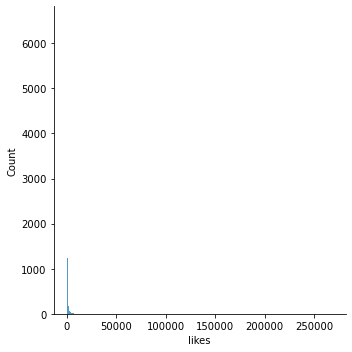

In [62]:
sns.displot(tweets,
            x = 'likes',
            edgecolor = 'none');

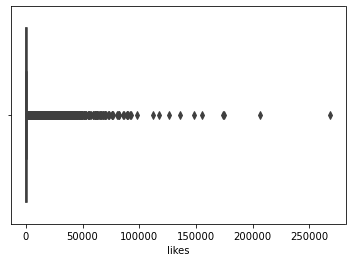

In [63]:
sns.boxplot(x=tweets['likes']);

In [64]:
# retweets?
tweets['retweet'].describe()

count    131139.000000
mean        265.606944
std         933.276293
min           0.000000
25%          59.000000
50%         109.000000
75%         216.000000
max      102805.000000
Name: retweet, dtype: float64

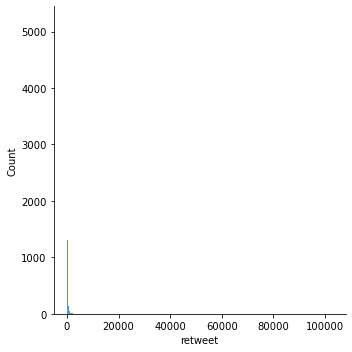

In [65]:
sns.displot(tweets,
            x = 'retweet',
            edgecolor = 'none');

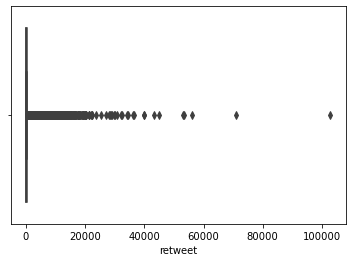

In [66]:
sns.boxplot(x=tweets['retweet']);

---

In [67]:
tweets.shape

(131139, 6)

In [68]:
tweets['hashtag'] = tweets['text'].apply(lambda x: re.findall(r"#(\w+)", x))

In [69]:
tweets.head()

,datetime,tweet_id,username,text,likes,retweet,hashtag
0,2020-01-20 22:47:13+00:00,1219390955905847299,ThisIsMarietta,Breaking News: The coronavirus is now confirme...,404,319,"[MondayThoughts, coronavirus, WuhanPneumonia]"
1,2020-01-20 21:20:57+00:00,1219369245940822017,deden1278,good luck everyone #coronavirus https://t.co/2...,17443,8905,[coronavirus]
2,2020-01-20 21:05:55+00:00,1219365461269213184,Urfacefooked,2020 just keeps getting a little more exciting...,594,159,[coronavirus]
3,2020-01-20 19:59:24+00:00,1219348721584025600,Varcarus,"The Plague was spread through rats, this year ...",348,53,[coronavirus]
4,2020-01-20 18:12:08+00:00,1219321726351396864,DrTedros,I am convening an Emergency Committee to ascer...,707,530,[coronavirus]


In [70]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131139 entries, 0 to 131138
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   datetime  131139 non-null  object
 1   tweet_id  131139 non-null  int64 
 2   username  131139 non-null  object
 3   text      131139 non-null  object
 4   likes     131139 non-null  int64 
 5   retweet   131139 non-null  int64 
 6   hashtag   131139 non-null  object
dtypes: int64(3), object(4)
memory usage: 7.0+ MB


In [71]:
tweets['tweet_id'].unique().shape

(131139,)

---

In [72]:
import preprocessor as p

In [76]:
# processing function
def text_process(df, text):
    # Removing hashtags, URLs, mentions, reserved words, emojis, smileys
    df['p_text'] = df[text].apply(lambda x: p.clean(x))
    
    # Remove digits
    df['p_text'] = df['p_text'].str.replace('\d+', '', regex=True)
    
    # remove punctuations
    df['p_text'] = df['p_text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
    
    # lower case
    df['p_text'] = df['p_text'].str.lower()
    

In [77]:
text_process(tweets, 'text')

In [78]:
tweets

,datetime,tweet_id,username,text,likes,retweet,hashtag,p_text
0,2020-01-20 22:47:13+00:00,1219390955905847299,ThisIsMarietta,Breaking News: The coronavirus is now confirme...,404,319,"[MondayThoughts, coronavirus, WuhanPneumonia]",breaking news the coronavirus is now confirme...
1,2020-01-20 21:20:57+00:00,1219369245940822017,deden1278,good luck everyone #coronavirus https://t.co/2...,17443,8905,[coronavirus],good luck everyone
2,2020-01-20 21:05:55+00:00,1219365461269213184,Urfacefooked,2020 just keeps getting a little more exciting...,594,159,[coronavirus],just keeps getting a little more exciting ever...
3,2020-01-20 19:59:24+00:00,1219348721584025600,Varcarus,"The Plague was spread through rats, this year ...",348,53,[coronavirus],the plague was spread through rats this year ...
4,2020-01-20 18:12:08+00:00,1219321726351396864,DrTedros,I am convening an Emergency Committee to ascer...,707,530,[coronavirus],i am convening an emergency committee to ascer...
...,...,...,...,...,...,...,...,...
131134,2022-05-31 05:11:22+00:00,1531503579986546688,virtuallysoph,"Well, shit.\nAfter escaping it for 2 years, it...",106,0,[Covid19],well shit after escaping it for years its fi...
131135,2022-05-31 03:51:09+00:00,1531483392776097792,j_mcelroy,#COVID19 wastewater measurements in Metro Vanc...,196,23,[COVID19],wastewater measurements in metro vancouver tre...
131136,2022-05-31 03:06:18+00:00,1531472108995645440,ellymelly,What frustrates me the most is that food short...,283,68,"[Covid19, ClimateChange]",what frustrates me the most is that food short...
131137,2022-05-31 00:15:08+00:00,1531429032713232385,JamieMetzl,For those of us who have been calling since ea...,432,182,[COVID19],for those of us who have been calling since ea...


---

In [79]:
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

In [80]:
# stopwords and lemmatizer

def process_words(df, text):
    # remove stopwords first
    stop_words = set(stopwords.words('english'))
    df['p_text'] = df[text].apply(lambda x: " ".join([item for item in x.split(' ') if item not in stop_words]))
    
    # tokenize and lemmatize
    lem = WordNetLemmatizer()
    tok = TweetTokenizer()
    
    for i, txt in enumerate(df['p_text']):
        lem_words = [lem.lemmatize(word) for word in tok.tokenize(txt)]
        df.at[i, 'p_text'] = ' '.join(lem_words)
        

In [81]:
process_words(tweets, 'p_text')

In [82]:
tweets

,datetime,tweet_id,username,text,likes,retweet,hashtag,p_text
0,2020-01-20 22:47:13+00:00,1219390955905847299,ThisIsMarietta,Breaking News: The coronavirus is now confirme...,404,319,"[MondayThoughts, coronavirus, WuhanPneumonia]",breaking news coronavirus confirmed spreadfrom...
1,2020-01-20 21:20:57+00:00,1219369245940822017,deden1278,good luck everyone #coronavirus https://t.co/2...,17443,8905,[coronavirus],good luck everyone
2,2020-01-20 21:05:55+00:00,1219365461269213184,Urfacefooked,2020 just keeps getting a little more exciting...,594,159,[coronavirus],keep getting little exciting every week first ...
3,2020-01-20 19:59:24+00:00,1219348721584025600,Varcarus,"The Plague was spread through rats, this year ...",348,53,[coronavirus],plague spread rat year year rat china
4,2020-01-20 18:12:08+00:00,1219321726351396864,DrTedros,I am convening an Emergency Committee to ascer...,707,530,[coronavirus],convening emergency committee ascertain whethe...
...,...,...,...,...,...,...,...,...
131134,2022-05-31 05:11:22+00:00,1531503579986546688,virtuallysoph,"Well, shit.\nAfter escaping it for 2 years, it...",106,0,[Covid19],well shit escaping year finally got
131135,2022-05-31 03:51:09+00:00,1531483392776097792,j_mcelroy,#COVID19 wastewater measurements in Metro Vanc...,196,23,[COVID19],wastewater measurement metro vancouver treatme...
131136,2022-05-31 03:06:18+00:00,1531472108995645440,ellymelly,What frustrates me the most is that food short...,283,68,"[Covid19, ClimateChange]",frustrates food shortage caused bureaucratic m...
131137,2022-05-31 00:15:08+00:00,1531429032713232385,JamieMetzl,For those of us who have been calling since ea...,432,182,[COVID19],u calling since early full investigation origi...


In [83]:
tweets.to_csv('../data/tweets_processed.csv', index=False)

---

gensim topic models

In [ ]:
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
import numpy
from gensim.matutils import hellinger

---

Sentiment labeling 1

In [ ]:
# from textblob import TextBlob
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# tweets[['polarity', 'subjectivity']] = tweets['p_text'].apply(lambda x: pd.Series(TextBlob(x).sentiment))

In [ ]:
# tweets

In [ ]:
# for index, row in tweets['p_text'].iteritems():
#     score = SentimentIntensityAnalyzer().polarity_scores(row)
#     neg = score['neg']
#     neu = score['neu']
#     pos = score['pos']
#     comp = score['compound']
  
#     if neg > pos:
#         tweets.loc[index, 'sentiment'] = 'negative'
#     elif pos > neg:
#         tweets.loc[index, 'sentiment'] = 'positive'
#     else:
#         tweets.loc[index, 'sentiment'] = 'neutral'
        
#     tweets.loc[index, 'neg'] = neg
#     tweets.loc[index, 'neu'] = neu
#     tweets.loc[index, 'pos'] = pos
#     tweets.loc[index, 'compound'] = comp

In [ ]:
# tweets

In [ ]:
# tweets['p_text'].iloc[131180]

In [ ]:
# tweets['text'].iloc[131180]

---

sentiment labeling 2

In [ ]:
# from ibm_watson import NaturalLanguageUnderstandingV1
# from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
# from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions

In [ ]:
# authenticator = IAMAuthenticator('FAyRi1tfL50v_jJYPGEDFLMdJfAjVuW8Dmkd-ijcTb9X')
# natural_language_understanding = NaturalLanguageUnderstandingV1(
#     version='2022-04-07',
#     authenticator=authenticator
# )

# natural_language_understanding.set_service_url('https://api.au-syd.natural-language-understanding.watson.cloud.ibm.com/instances/c39cbab4-7f4a-4a46-9909-ba70720da761')

In [ ]:
# def ibm_score(text):
#     response = natural_language_understanding.analyze(text=text,
#                                                      features=Features(sentiment=SentimentOptions()),
#                                                      language='en'
#                                                     ).get_result()
#     sentiment_score = response['sentiment']['document']['score']
    
#     return sentiment_score

In [ ]:
# for index, row in tweets['p_text'].iteritems():
#     score = ibm_score(row)
 
#     if score > 0:
#         tweets.loc[index, 'sentiment'] = 'positive'
#     elif score < 0:
#         tweets.loc[index, 'sentiment'] = 'negative'
#     else:
#         tweets.loc[index, 'sentiment'] = 'neutral'
        
#     tweets.loc[index, 'sentiment_score'] = score

In [ ]:
# tweets2 = tweets[tweets['sentiment_score'].isnull()]

In [ ]:
# for index, row in tweets2['p_text'].iteritems():
#     score = ibm_score(row)
 
#     if score > 0:
#         tweets.loc[index, 'sentiment'] = 'positive'
#     elif score < 0:
#         tweets.loc[index, 'sentiment'] = 'negative'
#     else:
#         tweets.loc[index, 'sentiment'] = 'neutral'
        
#     tweets.loc[index, 'sentiment_score'] = score

In [ ]:
# tweets = tweets[tweets['p_text']!='']

In [ ]:
# tweets2 = tweets[tweets['sentiment_score'].isnull()]

In [ ]:
# for index, row in tweets2['p_text'].iteritems():
#     score = ibm_score(row)
 
#     if score > 0:
#         tweets.loc[index, 'sentiment'] = 'positive'
#     elif score < 0:
#         tweets.loc[index, 'sentiment'] = 'negative'
#     else:
#         tweets.loc[index, 'sentiment'] = 'neutral'
        
#     tweets.loc[index, 'sentiment_score'] = score

In [ ]:
# tweets[tweets['sentiment_score'].isnull()]

---

In [ ]:
# response = natural_language_understanding.analyze(
#    text='banged nothing serious since overrun e motorcycle bona fide hog guy hit shouted right go mph enclosed bike lane electric anarchy zero law enforcement',
#    features=Features(sentiment=SentimentOptions())).get_result()

In [ ]:
# response['sentiment']['document']['score'] 
